In [2]:
#Importing Necessery Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform,StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

Libraries Imported

In [3]:
#Train data
data_train = pd.read_excel('Data_Train.xlsx')
#Test Data
data_test = pd.read_excel('Test_set.xlsx')

We have 2 sets of data here, One is for training purpose and another is for testing purpose 

In [3]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data_train.shape

(10683, 11)

There are 10683 rows and 11 columns in the training dataset

In [5]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
data_test.shape

(2671, 10)

There are 2671 rows and 10 columns in the testing dataset

In [4]:
#Adding source columns to both train and test data with 'train' and 'test' values
data_train['source'] = 'train'
data_test['source'] = 'test'
df = pd.concat([data_train,data_test],ignore_index = True) #Combining both train and test data
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


Combining both training and testing dataset for EDA

In [5]:
df.shape

(13354, 12)

By combining dataset we can see the change in the shape of the data, Now we have 13354 rows and 12 columns in the dataset

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'source'],
      dtype='object')

All Columns

In [6]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

As we can see there are single null value in Route and Total_stops resp. and 2671 in Price column because we don't have price column in the testing dataset

In [7]:
modevalue = df['Total_Stops'].mode()[0]
df['Total_Stops'].fillna(modevalue,inplace = True)

Filling the Nan in Total stops column with mode method

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13354 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  source           13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.2+ MB


As we can see there are all features have object data type and the target variable have float data type which means it is a regression problem

In [13]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Only one column is visible because we only have one column with the numerical data  

In [14]:
cat_df = df.select_dtypes('object')
cat_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'source'],
      dtype='object')

Columns with object data type

In [8]:
dates = ['Arrival_Time','Dep_Time','Date_of_Journey']

for i in dates:
    df[i] = pd.to_datetime(df[i])
    

Change the data type of the columns who have dates in it 

In [16]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
source                     object
dtype: object

In [9]:
duration_list = []
x=(df['Arrival_Time']-df['Dep_Time'])
for i in range(len(x)):
    dur=x.iloc[i].seconds/3600
    duration_list.append(dur)
df["Duration"]=duration_list

The duration column we have has object data type and we have to convert it into float so we will divide it by 3600

In [10]:
df["time_of_day"]=np.where((df["Dep_Time"].dt.hour>=0)&(df["Dep_Time"].dt.hour<=2),"Late Night",
                         np.where((df["Dep_Time"].dt.hour>=3)&(df["Dep_Time"].dt.hour<=7),"Early Morning",
                         np.where((df["Dep_Time"].dt.hour>=8)&(df["Dep_Time"].dt.hour<=11),"Morning",
                         np.where((df["Dep_Time"].dt.hour>=12)&(df["Dep_Time"].dt.hour<=16),"Afternoon",
                         np.where((df["Dep_Time"].dt.hour>=17)&(df["Dep_Time"].dt.hour<=19),"Evening",
                         "Night")))))

Creating feature 'time_of_day', To know that at what time of the day the flight travels because in next step we drop the departure and arrival column

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,time_of_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-09-02 22:20:00,2021-03-22 01:10:00,2.833333,non-stop,No info,3897.0,train,Night
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-02 05:50:00,2021-09-02 13:15:00,7.416667,2 stops,No info,7662.0,train,Early Morning
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-02 09:25:00,2021-06-10 04:25:00,19.000000,2 stops,No info,13882.0,train,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-09-02 18:05:00,2021-09-02 23:30:00,5.416667,1 stop,No info,6218.0,train,Evening
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-09-02 16:50:00,2021-09-02 21:35:00,4.750000,1 stop,No info,13302.0,train,Afternoon


In [11]:
#Some of the columns we can drop
df.drop(columns=["Date_of_Journey","Route","Arrival_Time","Dep_Time"],inplace=True)

The above columns are not much corelated with the target variable , So we can drop them

In [21]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,source,time_of_day
0,IndiGo,Banglore,New Delhi,2.833333,non-stop,No info,3897.0,train,Night
1,Air India,Kolkata,Banglore,7.416667,2 stops,No info,7662.0,train,Early Morning
2,Jet Airways,Delhi,Cochin,19.000000,2 stops,No info,13882.0,train,Morning
3,IndiGo,Kolkata,Banglore,5.416667,1 stop,No info,6218.0,train,Evening
4,IndiGo,Banglore,New Delhi,4.750000,1 stop,No info,13302.0,train,Afternoon


Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

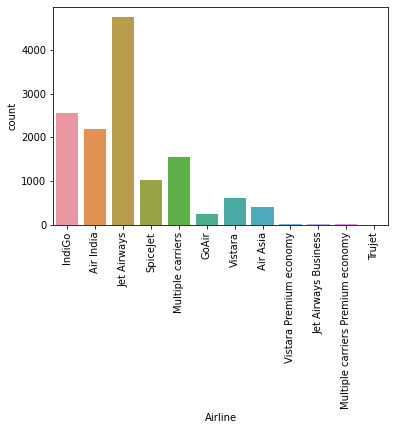

In [22]:
sns.countplot(df['Airline'])
plt.xticks(rotation = 90)
df['Airline'].value_counts()

From the above observation we can see that Jet_Airways,IndiGo,Air india have higher no. of flights resp.

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

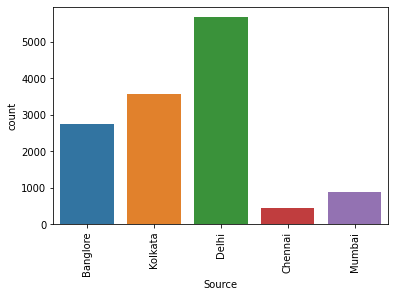

In [23]:
sns.countplot(df['Source'])
plt.xticks(rotation = 90)
df['Source'].value_counts()

As we can see most no. of flights departed from delhi, kolkata and from banglore airport

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

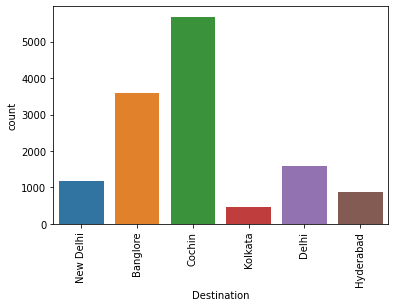

In [24]:
sns.countplot(df['Destination'])
plt.xticks(rotation = 90)
df['Destination'].value_counts()

As we can see most no of flights flies to the cochin and banglore

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

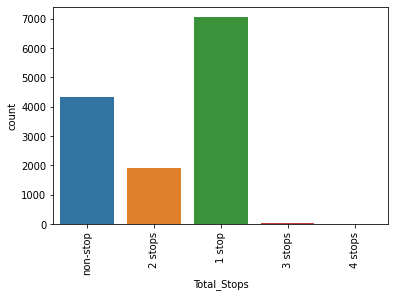

In [25]:
sns.countplot(df['Total_Stops'])
plt.xticks(rotation = 90)
df['Total_Stops'].value_counts()

Most no. of flights take only 1 stop and some of them are non-stop

In [12]:

df["Total_Stops"] = df["Total_Stops"].replace({'1 stop': '1',
                                               '2 stops':'2',
                                               '3 stops':'3',
                                               '4 stops':'4',
                                               'non-stop':'0'})

Converting the object data into numeric

In [13]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

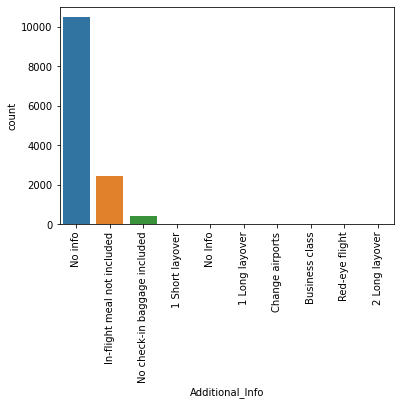

In [28]:
sns.countplot(df['Additional_Info'])
plt.xticks(rotation = 90)
df['Additional_Info'].value_counts()

In [14]:
#Convert No Info in No info because both are same
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

In [15]:
df['Additional_Info'].value_counts()

No info                         10496
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
Red-eye flight                      1
1 Short layover                     1
2 Long layover                      1
Name: Additional_Info, dtype: int64

Morning          3415
Early Morning    2955
Afternoon        2425
Night            2126
Evening          2110
Late Night        323
Name: time_of_day, dtype: int64

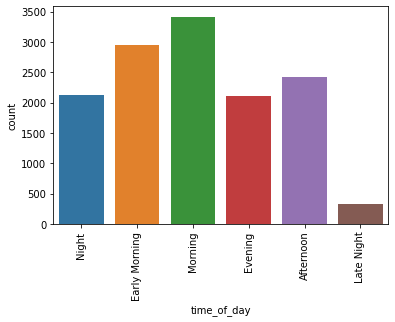

In [31]:
sns.countplot(df['time_of_day'])
plt.xticks(rotation = 90)
df['time_of_day'].value_counts()

Most no. of flights are in Morning 

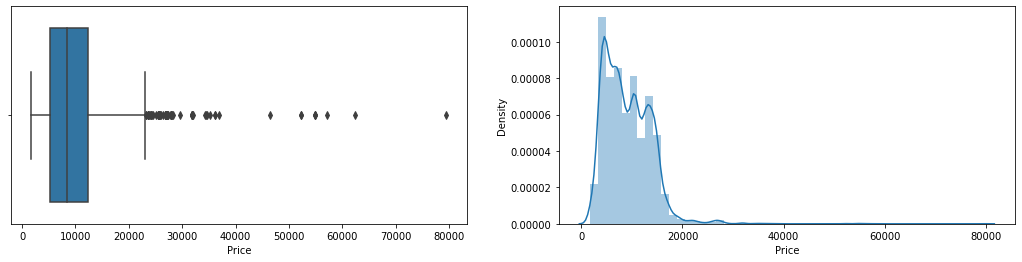

In [32]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Price'])
plt.subplot(1,2,2)
sns.distplot(df['Price'])

As we can see there are outliers present in Price column

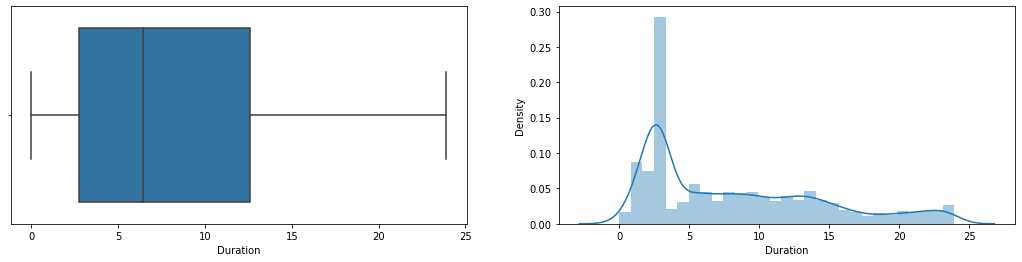

In [33]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Duration'])
plt.subplot(1,2,2)
sns.distplot(df['Duration'])

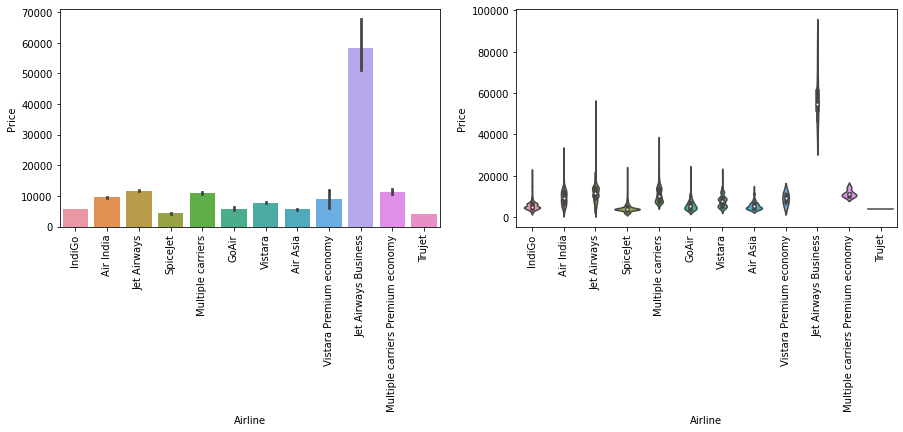

In [34]:
#lets check price variation of flight tickts wrt time of day
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x="Airline",y="Price", data=df)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.xticks(rotation = 90)
sns.violinplot(data =df ,x ='Airline',y ='Price')


As we can see jet Airways Business have higher price than others

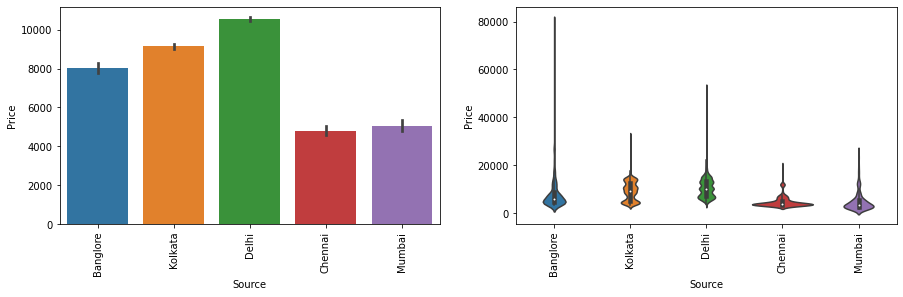

In [35]:
#lets check price variation of flight tickts wrt time of day
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x="Source",y="Price", data=df)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.xticks(rotation = 90)
sns.violinplot(data =df ,x ='Source',y ='Price')


The flights departed from Delhi, Kolkata, Banglore have higher ticket price

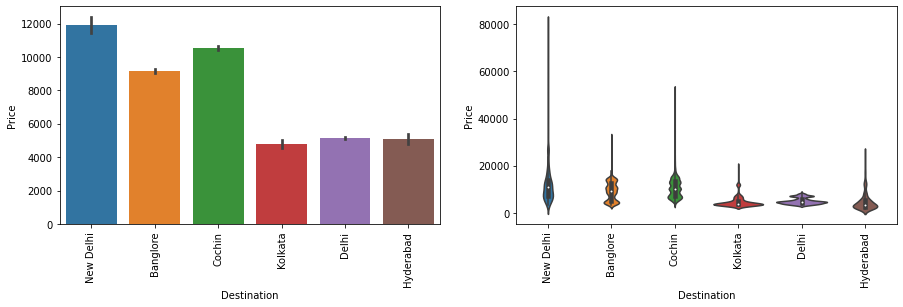

In [36]:
#lets check price variation of flight tickts wrt time of day
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x="Destination",y="Price", data=df)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.xticks(rotation = 90)
sns.violinplot(data =df ,x ='Destination',y ='Price')

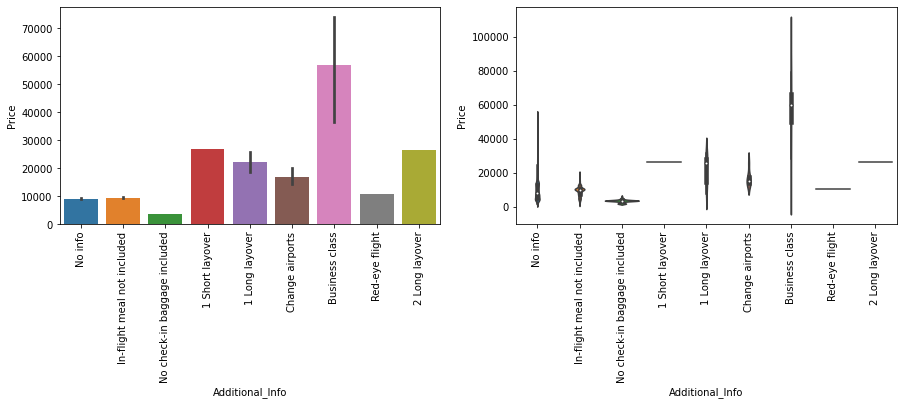

In [37]:
#lets check price variation of flight tickts wrt time of day
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x="Additional_Info",y="Price", data=df)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.xticks(rotation = 90)
sns.violinplot(data =df ,x ='Additional_Info',y ='Price')

As we can see Business class have higher prices

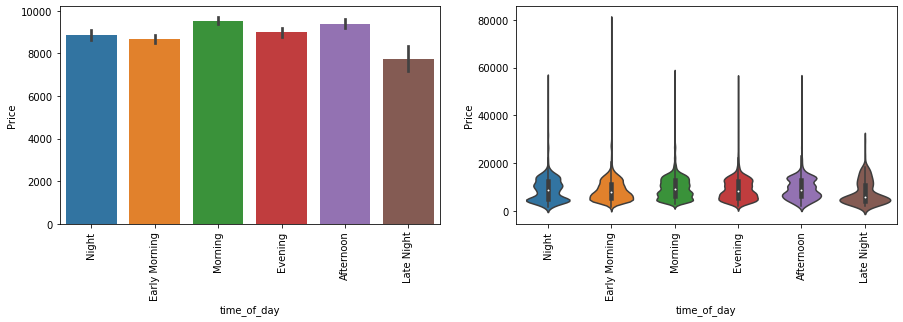

In [38]:
#lets check price variation of flight tickts wrt time of day
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x="time_of_day",y="Price", data=df)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.xticks(rotation = 90)
sns.violinplot(data =df ,x ='time_of_day',y ='Price')

The prices are same for time of day

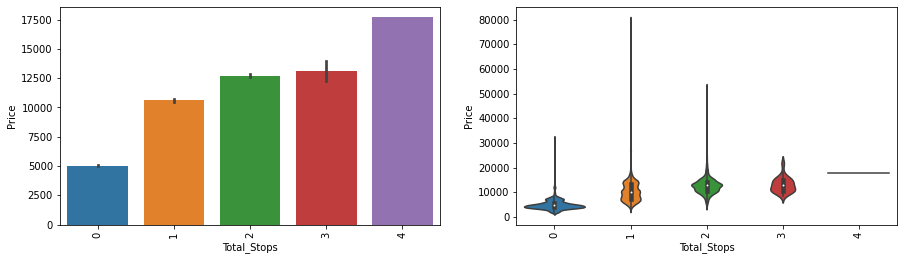

In [39]:
#lets check price variation of flight tickts wrt time of day
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x="Total_Stops",y="Price", data=df)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.xticks(rotation = 90)
sns.violinplot(data =df ,x ='Total_Stops',y ='Price')

If we have more no of stops then the price is more

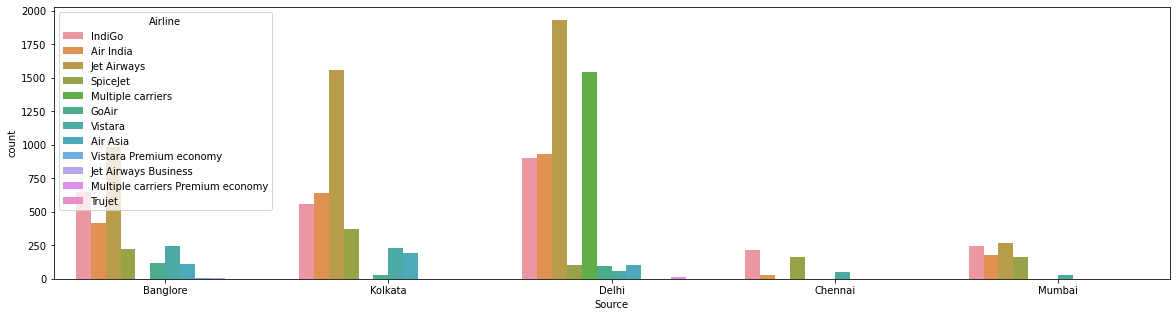

In [40]:
#Lets chcek the most popular flight region wise
plt.figure(figsize=(20,5))
sns.countplot(x="Source",hue="Airline",data=df)

As we can see Jet airways have higher no. of flights at all sources

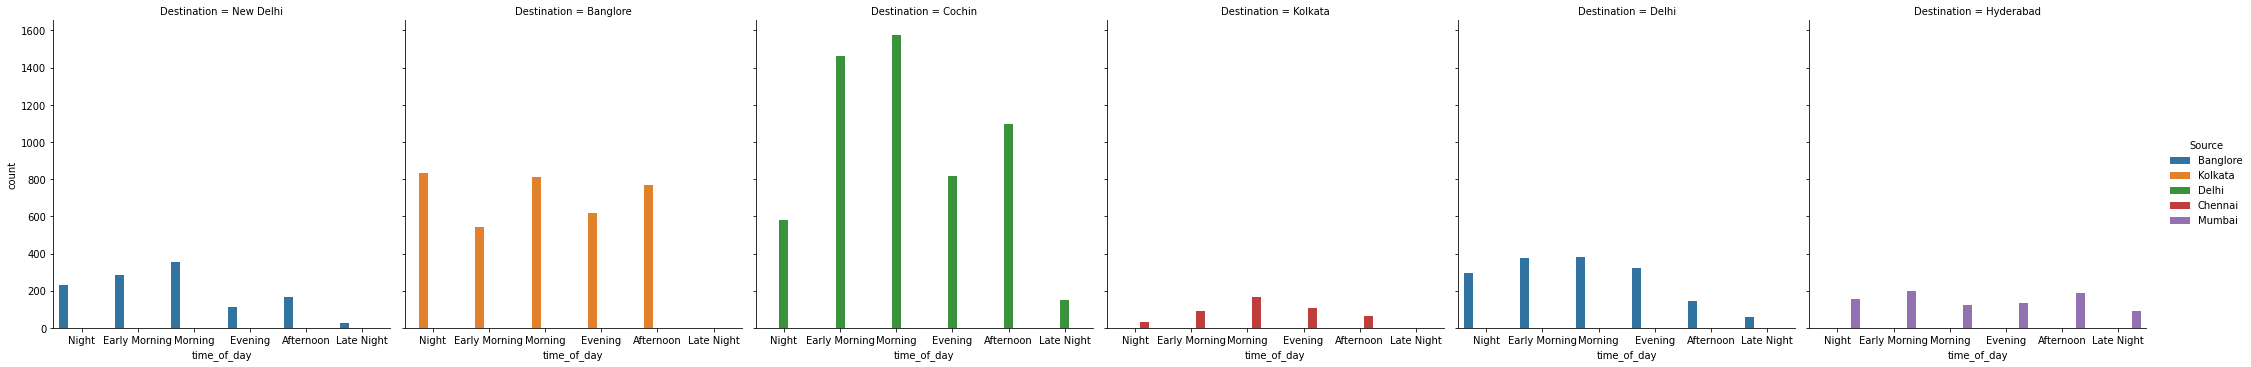

In [41]:
sns.catplot(data =df, x= 'time_of_day',hue ='Source',
           kind = 'count',col = 'Destination')

In [43]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,source,time_of_day
0,IndiGo,Banglore,New Delhi,2.833333,0,No info,3897.0,train,Night
1,Air India,Kolkata,Banglore,7.416667,2,No info,7662.0,train,Early Morning
2,Jet Airways,Delhi,Cochin,19.000000,2,No info,13882.0,train,Morning
3,IndiGo,Kolkata,Banglore,5.416667,1,No info,6218.0,train,Evening
4,IndiGo,Banglore,New Delhi,4.750000,1,No info,13302.0,train,Afternoon
...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,23.916667,1,No info,NaN,test,Night
13350,IndiGo,Kolkata,Banglore,2.583333,0,No info,NaN,test,Afternoon
13351,Jet Airways,Delhi,Cochin,6.583333,1,No info,NaN,test,Night
13352,Air India,Delhi,Cochin,15.250000,1,No info,NaN,test,Early Morning


In [16]:
#Encoding the categorical data
encode = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'time_of_day']
le = LabelEncoder()
for i in encode:
    df[i] = le.fit_transform(df[i])
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,source,time_of_day
0,3,0,5,2.833333,0,7,3897.0,train,5
1,1,3,0,7.416667,2,7,7662.0,train,1
2,4,2,1,19.000000,2,7,13882.0,train,4
3,3,3,0,5.416667,1,7,6218.0,train,2
4,3,0,5,4.750000,1,7,13302.0,train,0
...,...,...,...,...,...,...,...,...,...
13349,1,3,0,23.916667,1,7,NaN,test,5
13350,3,3,0,2.583333,0,7,NaN,test,0
13351,4,2,1,6.583333,1,7,NaN,test,5
13352,1,2,1,15.250000,1,7,NaN,test,1


Converting object data type to the numerical

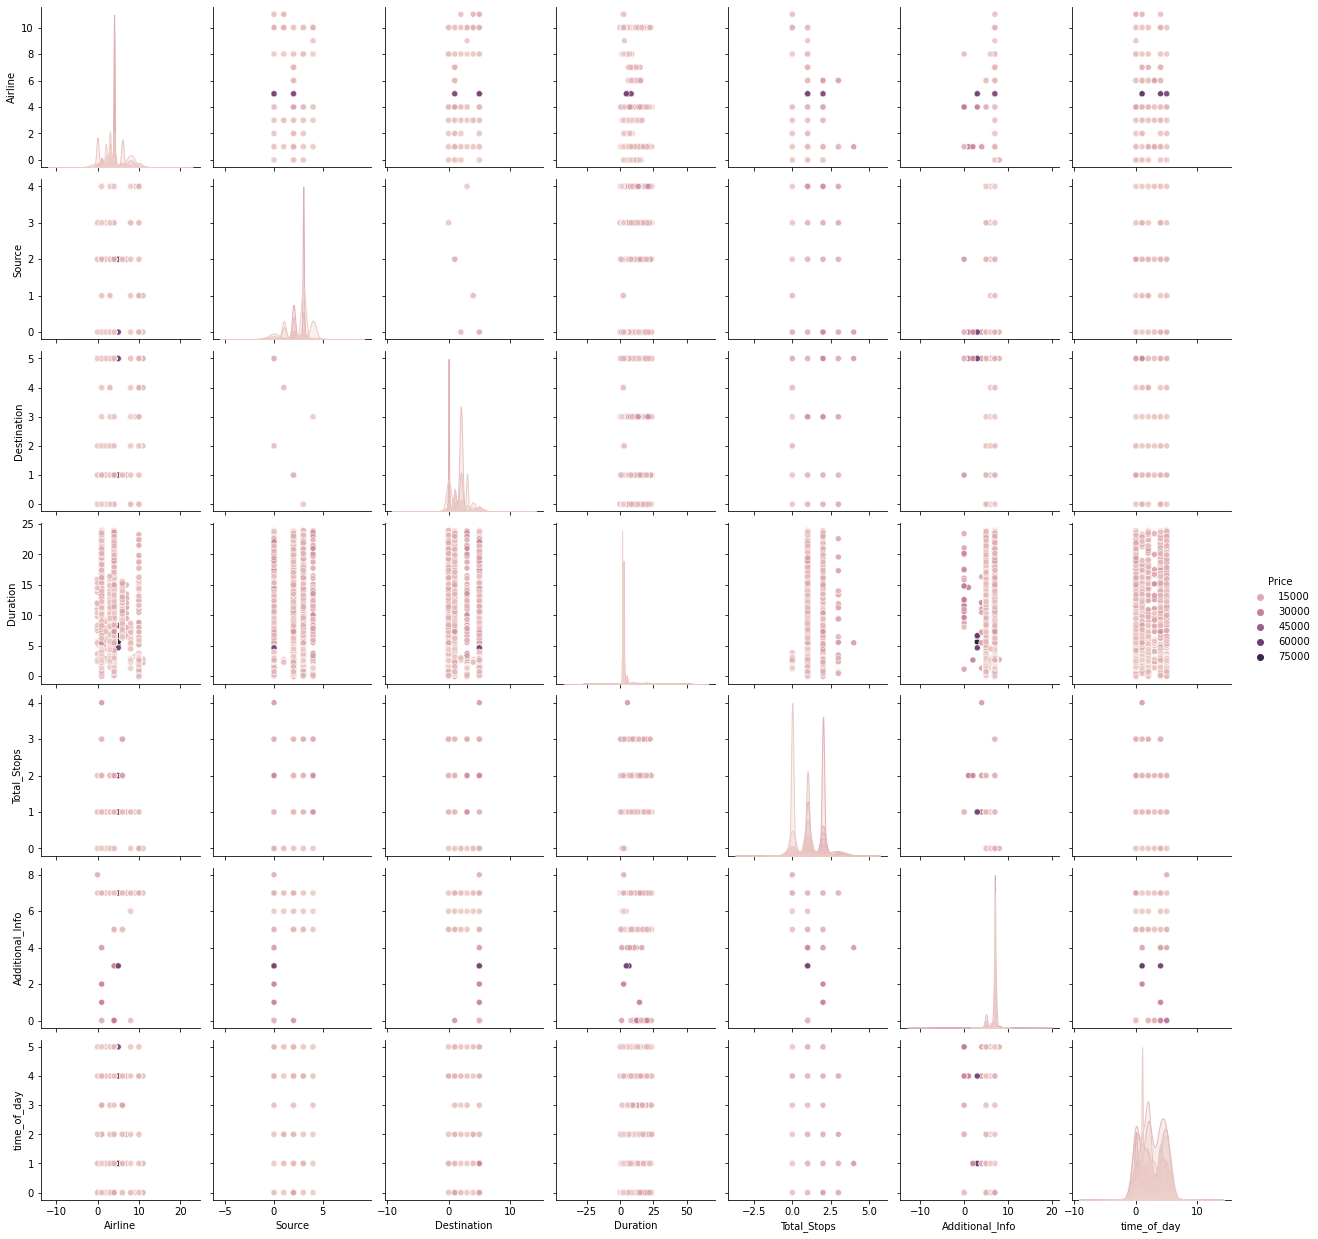

In [17]:
sns.pairplot(df,hue = 'Price')

In [46]:
df_corr = df.corr().abs()
df_corr

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,time_of_day
Airline,1.000000,0.018547,0.022130,0.099603,0.206350,0.075992,0.039520,0.035639
Source,0.018547,1.000000,0.589710,0.107929,0.191144,0.017172,0.015998,0.040682
Destination,0.022130,0.589710,1.000000,0.219609,0.294183,0.015026,0.071112,0.023525
Duration,0.099603,0.107929,0.219609,1.000000,0.593700,0.139375,0.450205,0.023103
Total_Stops,0.206350,0.191144,0.294183,0.593700,1.000000,0.064317,0.603883,0.061755
Additional_Info,0.075992,0.017172,0.015026,0.139375,0.064317,1.000000,0.063769,0.023984
Price,0.039520,0.015998,0.071112,0.450205,0.603883,0.063769,1.000000,0.009663
time_of_day,0.035639,0.040682,0.023525,0.023103,0.061755,0.023984,0.009663,1.000000


As we can see there is no major coralation between the columns

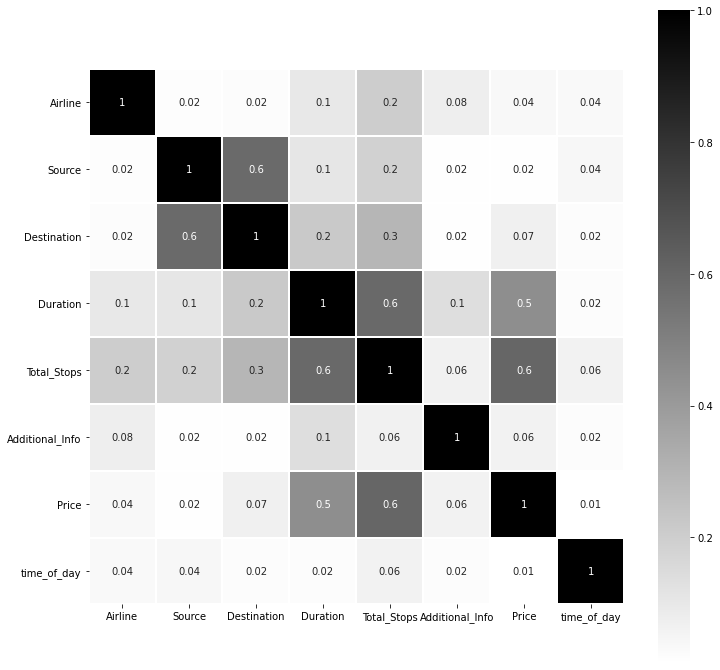

In [47]:
plt.figure(figsize = (12,12))
sns.heatmap(df_corr,annot = True,square = True,
           fmt ='.1g',linewidth = 1, cmap  = 'binary')

In [48]:
#finding boundary values
print('Highest allowed',df['Price'].mean()+3*df['Price'].std())

Highest allowed 22921.141621016657


Highest allowed no is 22921

In [49]:
#Remove outliers
new_df = df[(df['Price']<22921)]

Prices less than highest allowed 

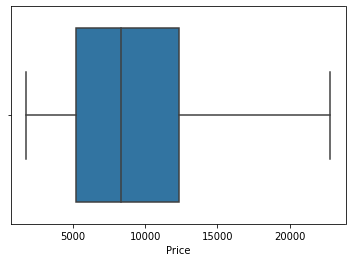

In [50]:
sns.boxplot(new_df['Price'])

As we can see we removed all the outliers and in result we get 20 % data loss but Price is a target variable , we can't remove outliers from target variable.

In [51]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',new_df.shape)
print('Percentage Loss:',((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (13354, 9)
Shape After: (10587, 9)
Percentage Loss: 20.720383405721133


In [52]:
df.skew()

Airline            0.720924
Source            -0.424151
Destination        1.247893
Duration           0.823453
Total_Stops        0.317797
Additional_Info   -2.077030
Price              1.812552
time_of_day        0.075846
dtype: float64

Checking skewness of the data and there is skewness in price and duration column but we cant remove skewness from the price column 

In [53]:
df['Duration'] = np.sqrt(df['Duration'])

Removed skewness ffrom the duration column

In [54]:
df.skew()

Airline            0.720924
Source            -0.424151
Destination        1.247893
Duration           0.325285
Total_Stops        0.317797
Additional_Info   -2.077030
Price              1.812552
time_of_day        0.075846
dtype: float64

In [55]:
df_train=df.loc[df["source"]=="train"]
df_test=df.loc[df["source"]=="test"]
df_test.reset_index(drop=True,inplace=True)
df_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,source,time_of_day
0,4,2,1,3.304038,1,7,NaN,test,2
1,3,3,0,2.000000,1,7,NaN,test,1
2,4,2,1,4.873397,1,5,NaN,test,2
3,6,2,1,3.605551,1,7,NaN,test,4
4,0,0,2,1.683251,0,7,NaN,test,5


Seprating the train and test data from the source column we added earlier specially for identification 

In [56]:
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,source,time_of_day
0,3,0,5,1.683251,0,7,3897.0,train,5
1,1,3,0,2.723356,2,7,7662.0,train,1
2,4,2,1,4.358899,2,7,13882.0,train,4
3,3,3,0,2.327373,1,7,6218.0,train,2
4,3,0,5,2.179449,1,7,13302.0,train,0


In [57]:
#lets drop source column from df_train and df_test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

Deleting the source column we added earlier for identification purpose 

In [58]:
#Lets drop the Item_Outlet_Sales from test dataset as that is the o/p variable that needs to be predicted
df_test.drop(columns=["Price"],inplace=True)

Droping thr price column from test data because this is what we have to predict and all the column have 0 value 

In [59]:
df_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,time_of_day
0,4,2,1,3.304038,1,7,2
1,3,3,0,2.000000,1,7,1
2,4,2,1,4.873397,1,5,2
3,6,2,1,3.605551,1,7,4
4,0,0,2,1.683251,0,7,5


In [60]:
#seprating input and output from df_train
x = df_train.drop('Price',axis =1)
y = df_train["Price"]

Seprating the featyre and label from the dataset

In [61]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Scaling the data by using standard scaler

In [62]:
#Finding the best random state
maxR2 = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    R2score = r2_score(y_test,pred)
    if R2score > maxR2:
        maxR2 = R2score
        maxRS = i
print('R2 score is',maxR2, 'on Random State',maxRS)

R2 score is 0.45554195571213274 on Random State 98


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

R2_Score of Linear regression: 0.45554195571213274
MAE: 2419.2853668617195
MSE: 9893243.890755968
RMSE: 3145.3527450440224


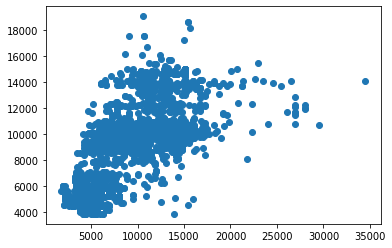

In [64]:
#Applying linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print('R2_Score of Linear regression:',r2_score(y_test,predlr))
print('MAE:', metrics.mean_absolute_error(y_test, predlr))
print('MSE:', metrics.mean_squared_error(y_test, predlr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlr)))
plt.scatter(x=y_test,y=predlr)

By applying Linear regression to the model we get 0.45 r_2 score

R2_score of Random Forest: 0.6759019434169078
MAE: 1315.312014788093
MSE: 5889124.335540669
RMSE: 2426.7518075692597


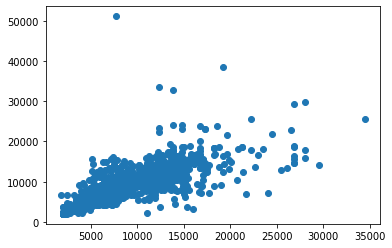

In [65]:
#Applying RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

By applying RandomForestRegressor to the model we get 0.67 r_2 score

R2_score of KNN : 0.7113231769334395
MAE: 1320.0176712841633
MSE: 5245491.817356795
RMSE: 2290.3038700916513


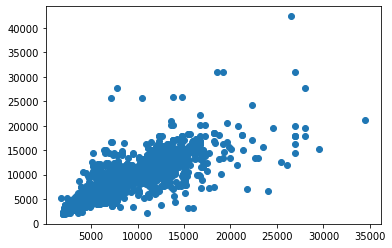

In [66]:
#Applying KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNR = r2_score(y_test,predknn)
print('R2_score of KNN :',KNNR)
print('MAE:', metrics.mean_absolute_error(y_test, predknn))
print('MSE:', metrics.mean_squared_error(y_test, predknn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predknn)))
plt.scatter(x=y_test,y=predknn)

By applying KNeighborsRegressor to the model we get 0.71 r_2 score

R2_score of SVR : 0.08272381677719864
MAE: 3252.8557379256413
MSE: 16667651.605137935
RMSE: 4082.6035326906203


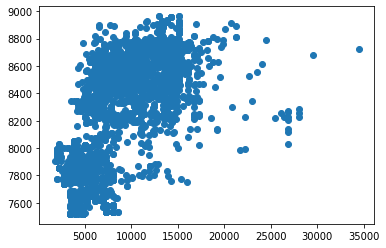

In [67]:
#Applying SVR
from sklearn import svm
SVR = svm.SVR()
SVR.fit(x_train,y_train)
predsvr = SVR.predict(x_test)
SVRR = r2_score(y_test,predsvr)
print('R2_score of SVR :',SVRR)
print('MAE:', metrics.mean_absolute_error(y_test, predsvr))
print('MSE:', metrics.mean_squared_error(y_test, predsvr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predsvr)))
plt.scatter(x=y_test,y=predsvr)

By applying SVR to the model we get 0.08 r_2 score

R2_score of DT: 0.5913863422570473
MAE: 1397.5244271512627
MSE: 7424841.299631065
RMSE: 2724.8561979728515


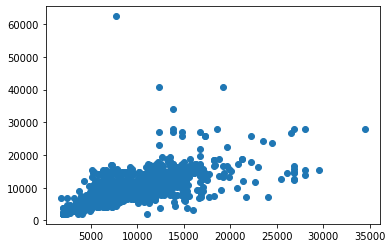

In [68]:
#Applying DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
DTR = r2_score(y_test,preddt)
print('R2_score of DT:',DTR)
print('MAE:', metrics.mean_absolute_error(y_test, preddt))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))
plt.scatter(x=y_test,y=preddt)

By applying DecisionTreeRegressor to the model we get 0.59 r_2 score

As we can see KNN gives us Best r2 score with minimum RMSE, So we use KNN for GridSearchCV

In [69]:
#Parameters for KNN

parameters = {'n_neighbors':[3,4,5,6,7],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[30,40,20]}

Parameters for KNN

In [70]:
GCV = GridSearchCV(KNN,param_grid = parameters,cv = 5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'n_neighbors': 4,
 'weights': 'uniform'}

Best parameters

R2 Score of the final Model: 70.06690341430316
MAE: 1322.4394421564957
MSE: 7424841.299631065
RMSE: 2724.8561979728515


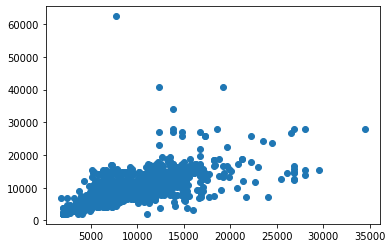

In [73]:
mod = KNeighborsRegressor(algorithm = 'ball_tree',leaf_size = 30,n_neighbors = 4,weights = 'uniform')

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print('R2 Score of the final Model:',r2_score(y_test,pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))
plt.scatter(x=y_test,y=preddt)

By applying best params to the KNN model we get 70.06 r2 score and 2724 RMSE

In [75]:
#Scaling the test data 
test_scaled  = scaler.fit_transform(df_test)
#Predicting sales of the test data
price_pred = mod.predict(test_scaled)

Scaling the testing data for prediction

In [76]:
#Make the dataframe for price_pred
price_pred=pd.DataFrame(price_pred,columns=["Price"])

In [77]:
price_pred

,Price
0,14134.25
1,4226.00
2,10921.00
3,12607.50
4,4592.25
...,...
2666,10695.50
2667,4804.00
2668,14647.25
2669,9631.75


In [78]:
df_test['Price'] = price_pred

Adding the predicted preice column with testing data

In [79]:
df_test

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,time_of_day,Price
0,4,2,1,3.304038,1,7,2,14134.25
1,3,3,0,2.000000,1,7,1,4226.00
2,4,2,1,4.873397,1,5,2,10921.00
3,6,2,1,3.605551,1,7,4,12607.50
4,0,0,2,1.683251,0,7,5,4592.25
...,...,...,...,...,...,...,...,...
2666,1,3,0,4.890467,1,7,5,10695.50
2667,3,3,0,1.607275,0,7,0,4804.00
2668,4,2,1,2.565801,1,7,5,14647.25
2669,1,2,1,3.905125,1,7,1,9631.75


In [80]:
import joblib
joblib.dump(mod,'FlightPricePred.pkl')

['FlightPricePred.pkl']